In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv("salaries_analysis_cleaned.csv", index_col=0)


In [66]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_age',
       'is_headquarters', 'seniority', 'comp_num', 'desc_len', 'python', 'R'],
      dtype='object')

In [67]:
data = data[["Job Title", "Rating", "Location", "Size","company_age", "python", "R", "avg_salary", "is_headquarters", "seniority", "comp_num" ,"desc_len", "Industry"]]

In [68]:
data

,Job Title,Rating,Location,Size,company_age,python,R,avg_salary,is_headquarters,seniority,comp_num,desc_len,Industry
0,software engineer,5.0,"San Francisco, CA",350,11,False,False,150.0,1,not mentioned,0,711,Internet
1,ml engineer,3.8,"Redwood City, CA",125,10,True,False,141.5,1,not mentioned,3,594,Biotech & Pharmaceuticals
2,data scientist,3.4,"New York, NY",3000,17,True,False,146.0,1,sr,1,566,Internet
3,software engineer,4.0,"Atlanta, GA",350,9,True,False,159.5,1,lead,0,600,Enterprise Software & Network Solutions
4,ml engineer,3.5,"Mountain View, CA",3000,32,True,False,138.0,1,not mentioned,3,551,Computer Hardware & Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,data engineer,4.2,"Carpinteria, CA",3000,18,False,False,190.0,1,lead,0,571,Computer Hardware & Software
410,data engineer,4.0,"Danvers, MA",3000,39,True,False,93.5,1,mid-level,2,943,Biotech & Pharmaceuticals
411,data scientist,3.8,"Baltimore, MD",750,15,False,False,97.0,0,sr,0,452,Advertising & Marketing
412,data engineer,4.0,"Los Angeles, CA",7500,101,True,False,84.0,1,not mentioned,3,423,Health Care Services & Hospitals


In [69]:
data_dum = pd.get_dummies(data)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x = data_dum.drop("avg_salary", axis=1, inplace=False)
y = data_dum["avg_salary"].values

In [72]:
x

,Rating,Size,company_age,python,R,is_headquarters,comp_num,desc_len,Job Title_data engineer,Job Title_data scientist,...,Industry_Social Assistance,Industry_Staffing & Outsourcing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Venture Capital & Private Equity,Industry_Video Games,Industry_Wood Product Manufacturing
0,5.0,350,11,False,False,1,0,711,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.8,125,10,True,False,1,3,594,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.4,3000,17,True,False,1,1,566,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4.0,350,9,True,False,1,0,600,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,3000,32,True,False,1,3,551,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,4.2,3000,18,False,False,1,0,571,1,0,...,0,0,0,0,0,0,0,0,0,0
410,4.0,3000,39,True,False,1,2,943,1,0,...,0,0,0,0,0,0,0,0,0,0
411,3.8,750,15,False,False,0,0,452,0,1,...,0,0,0,0,0,0,0,0,0,0
412,4.0,7500,101,True,False,1,3,423,1,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
y

array([150. , 141.5, 146. , 159.5, 138. , 162.5, 100. , 113. ,  72.5,
       136.5, 145. , 147. ,  94.5, 201.5,  83.5, 167.5, 113. , 165.5,
        78. , 154.5, 121. , 111.5, 295. , 137.5,  78. , 104. , 163. ,
        98. , 159. , 133.5,  90. , 125.5, 103. ,  86. , 105.5,  75. ,
       117.5, 187. , 148.5, 121.5,  84. ,  95.5, 121. , 169. ,  98. ,
        88. , 156.5, 159. , 121.5,  98. , 151. , 151.5, 126. ,  96.5,
       172. , 118. , 153.5,  97. , 145. ,  95.5, 196.5,  97. , 265. ,
       133. ,  95.5,  83. ,  77.5,  74.5, 175.5,  87.5, 184.5, 137.5,
       206.5, 143.5, 108.5, 101. , 191. , 118.5,  85. , 187. ,  88. ,
       105. ,  98. ,  90. , 147.5, 171. , 123. ,  64.5, 154.5,  88. ,
       142.5, 145. , 172. , 140.5, 142. , 123. , 167.5, 201.5, 169.5,
        58. , 153.5,  74.5, 186.5, 211. ,  57.5, 187.5, 112.5, 164. ,
        90. , 180. , 131.5, 163.5, 109. , 163.5, 103.5, 205.5, 140. ,
       186.5, 129.5, 138.5,  55. , 156.5, 145. , 117. , 115. , 133.5,
       161.5, 142.5,

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [75]:
x_train

,Rating,Size,company_age,python,R,is_headquarters,comp_num,desc_len,Job Title_data engineer,Job Title_data scientist,...,Industry_Social Assistance,Industry_Staffing & Outsourcing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Venture Capital & Private Equity,Industry_Video Games,Industry_Wood Product Manufacturing
326,3.4,3000,16,True,False,1,0,420,1,0,...,0,0,0,0,0,0,0,0,0,0
410,4.0,3000,39,True,False,1,2,943,1,0,...,0,0,0,0,0,0,0,0,0,0
391,3.4,7500,2,True,False,0,0,886,0,1,...,0,0,0,0,0,0,0,0,0,0
352,3.9,3000,60,False,False,0,0,981,1,0,...,0,0,0,0,0,0,0,0,0,0
132,3.8,3000,30,True,False,1,3,609,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,3.9,10000,26,True,False,0,3,637,0,0,...,0,0,0,0,0,0,0,0,0,0
106,3.2,10000,176,True,False,0,0,400,0,0,...,0,0,0,0,0,0,0,0,0,0
270,3.9,10000,221,True,False,1,0,480,0,0,...,0,0,0,0,0,0,0,0,0,0
348,3.6,350,11,False,False,0,0,300,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
x_test

,Rating,Size,company_age,python,R,is_headquarters,comp_num,desc_len,Job Title_data engineer,Job Title_data scientist,...,Industry_Social Assistance,Industry_Staffing & Outsourcing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Venture Capital & Private Equity,Industry_Video Games,Industry_Wood Product Manufacturing
358,3.1,350,8,True,False,1,0,806,0,0,...,0,0,0,0,0,0,0,0,0,0
350,3.9,10000,173,True,False,0,2,520,0,1,...,0,0,0,0,0,0,0,0,0,0
373,3.8,125,6,True,False,1,0,384,0,0,...,0,0,0,0,0,0,0,0,0,0
399,3.5,125,43,True,False,0,0,829,0,0,...,0,0,0,0,0,0,0,0,0,0
369,3.5,750,13,False,False,0,0,408,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,4.5,10000,16,True,False,0,3,568,0,0,...,0,0,0,0,0,0,0,0,0,0
261,3.3,3000,77,True,True,0,3,1100,0,1,...,0,0,0,0,0,0,0,0,0,0
297,3.9,10000,26,True,False,1,3,394,1,0,...,0,0,0,0,0,0,0,0,0,0
113,3.9,10000,26,True,False,1,3,430,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
reg = LinearRegression().fit(x_train, y_train)

In [79]:
reg.score(x_train, y_train)

0.8687821713759093

In [80]:
reg.score(x_test, y_test)

0.5458146125566907

In [81]:
# try different models
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
reg.score(x_train, y_train)

0.7950126192927588

In [83]:
reg.score(x_test, y_test)

0.5499124112871707

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
cross_val_score(reg, x_train, y_train, scoring = "neg_mean_absolute_error")

C:\Users\M-Ashour\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([-17.39482686, -17.61690156, -18.27038543])

In [93]:
alpha = []
error = []

for i in range(10):
    alpha.append(i/100)
    reg = linear_model.Lasso(alpha=i/100)
    reg.fit(x_train, y_train)
    error.append(np.mean(cross_val_score(reg, x_train, y_train, scoring = "neg_mean_absolute_error")))
    
    

C:\Users\M-Ashour\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\M-Ashour\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\M-Ashour\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\M-Ashour\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M-Ashour\Anac

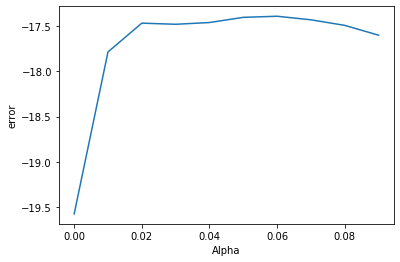

In [94]:
plt.plot(alpha, error)
plt.xlabel("Alpha")
plt.ylabel("error")
plt.show()

In [95]:
np.max(error)

-17.388079056624107

In [96]:
np.min(error)

-19.577729601770283

In [97]:
error.index(np.max(error))

6

In [98]:
alpha[6]

0.06

In [111]:
#random forest
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=15, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))

0.937832382202334


C:\Users\M-Ashour\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [112]:
regr.score(x_test, y_test)

0.5711811789551329

In [122]:
np.mean(cross_val_score(regr, x_train, y_train, scoring = "neg_mean_absolute_error", cv=10))

-15.5431504168458

In [144]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':list(range(50, 200, 10)), 'max_depth':list(range(2,15)),\
             "max_features": ("auto", "sqrt", "log2")}
regr_best = GridSearchCV(regr, parameters,scoring = "neg_mean_absolute_error", cv=10)

In [145]:
regr_best

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'max_features': ('auto', 'sqrt', 'log2')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [146]:
regr_best.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'max_features': ('auto', 'sqrt', 'log2')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [147]:
regr_best.score(x_train, y_train)

-8.387795243381694

In [148]:
regr_best.score(x_test, y_test)

-18.37682623804425

In [149]:
import pickle

In [151]:
filename = 'finalized_model.sav'
pickle.dump(regr_best, open(filename, 'wb'))
